C:\Users\gutuw\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Test accuracy: 0.45
Test precision: 0.15
Test recall: 0.33
Test F1 score: 0.21


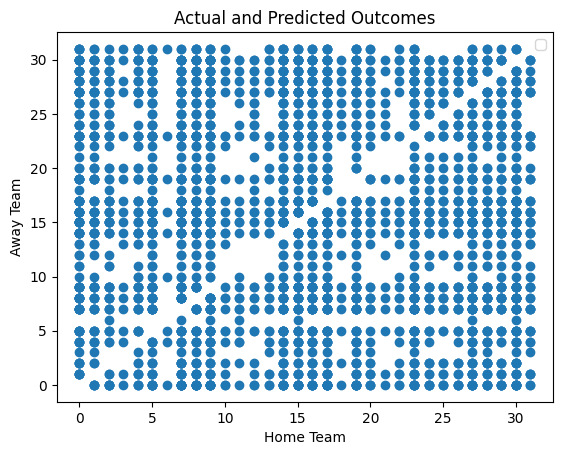

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import joblib
import matplotlib.pyplot as plt

#loading our fifa dataset
df_merge = pd.read_csv('merged.csv')
df_away = pd.read_csv("awaydict.csv")
df_home = pd.read_csv("homedict.csv")
selected_features = ['HomeTeam', 'AwayTeam','FTR']
df = df_merge[selected_features].copy()

# Create a LabelEncoder object
encoder = LabelEncoder()
df.loc[:, 'HomeTeam_encoded'] = encoder.fit_transform(df['HomeTeam'])
df.loc[:, 'AwayTeam_encoded'] = encoder.fit_transform(df['AwayTeam'])
df.loc[:, 'Result_num'] = encoder.fit_transform(df['FTR'])
df.drop(['HomeTeam', 'AwayTeam', 'FTR'], axis=1, inplace=True)

# Scale the features to have the same range
scaler = MinMaxScaler()
X = scaler.fit_transform(df[['HomeTeam_encoded', 'AwayTeam_encoded']])
y = df['Result_num']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a logistic regression model
model = LogisticRegression(C=30,max_iter=10000, random_state=42)

# Train a logistic regression model on the training set
model.fit(X_train, y_train)

# Evaluate the performance of the model on the testing set
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
print(f'Test accuracy: {accuracy:.2f}')
print(f'Test precision: {precision:.2f}')
print(f'Test recall: {recall:.2f}')
print(f'Test F1 score: {f1:.2f}')


# Calculate predicted probabilities for each class
y_proba = model.predict_proba(X_test)

# Plot predicted probabilities against actual outcomes
# fig, ax = plt.subplots()
# ax.scatter(y_test, y_proba[:, 0], label='Loss')
# ax.scatter(y_test, y_proba[:, 1], label='Draw')
# ax.scatter(y_test, y_proba[:, 2], label='Win')
# ax.plot([0, 2], [0, 2], '--', label='Ideal Model')
# ax.legend()
# ax.set_xlabel('Actual Outcome')
# ax.set_ylabel('Predicted Probability')
# ax.set_title('Bias-Variance Tradeoff')
# plt.show()

fig, ax = plt.subplots()
ax.scatter(df["HomeTeam_encoded"],df['AwayTeam_encoded'])
#ax.scatter(df['AwayTeam_encoded'])
ax.legend()
ax.set_xlabel('Home Team')
ax.set_ylabel('Away Team')
ax.set_title('Actual and Predicted Outcomes')
plt.show()